In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [12]:
df = pd.read_csv('amazon.csv', encoding='ISO-8859-1', parse_dates=['date'])
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [6]:
df.shape

(6454, 5)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [16]:
df['month'] = df['month'].map({'Janeiro': 'Jan',
    'Fevereiro': 'Feb',
    'Março': 'Mar',
    'Abril': 'Apr',
    'Maio': 'May',
    'Junho': 'Jun',
    'Julho': 'Jul',
    'Agosto': 'Aug',
    'Setembro': 'Sep',
    'Outubro': 'Oct',
    'Novembro': 'Nov',
    'Dezembro': 'Dec' })

In [18]:
df[df['number'] > 0]['number'].sum()

698811.073

In [19]:
df.groupby('month')['number'].sum().sort_values(ascending=False)

month
Jul    92319.113
Oct    88681.579
Aug    88050.435
Nov    85508.054
Sep    58578.305
Dec    57535.480
Jun    55997.675
Jan    47681.844
May    34725.363
Feb    30839.050
Mar    30709.405
Apr    28184.770
Name: number, dtype: float64

In [20]:
df.groupby('year')['number'].sum().sort_values(ascending=False)

year
2003    42760.674
2016    42212.229
2015    41208.292
2012    40084.860
2014    39621.183
2009    39116.178
2004    38450.163
2002    37390.600
2010    37037.449
2017    36619.624
2013    35137.118
2005    35004.965
2011    34633.545
2006    33824.161
2007    33028.413
2008    29378.964
2001    29054.612
2000    27351.251
1999    26882.821
1998    20013.971
Name: number, dtype: float64

In [21]:
df.groupby('state')['number'].sum().sort_values(ascending=False)

state
Mato Grosso         96246.028
Paraiba             52426.918
Sao Paulo           51121.198
Rio                 45094.865
Bahia               44746.226
Piau                37803.747
Goias               37695.520
Minas Gerais        37475.258
Tocantins           33707.885
Amazonas            30650.129
Ceara               30428.063
Maranhao            25129.131
Pará                24512.144
Pernambuco          24498.000
Roraima             24385.074
Santa Catarina      24359.852
Amapa               21831.576
Rondonia            20285.429
Acre                18464.030
Espirito Santo       6546.000
Alagoas              4606.000
Distrito Federal     3561.000
Sergipe              3237.000
Name: number, dtype: float64

In [23]:
df[df['state']=='Amazonas']['number'].sum()

30650.129

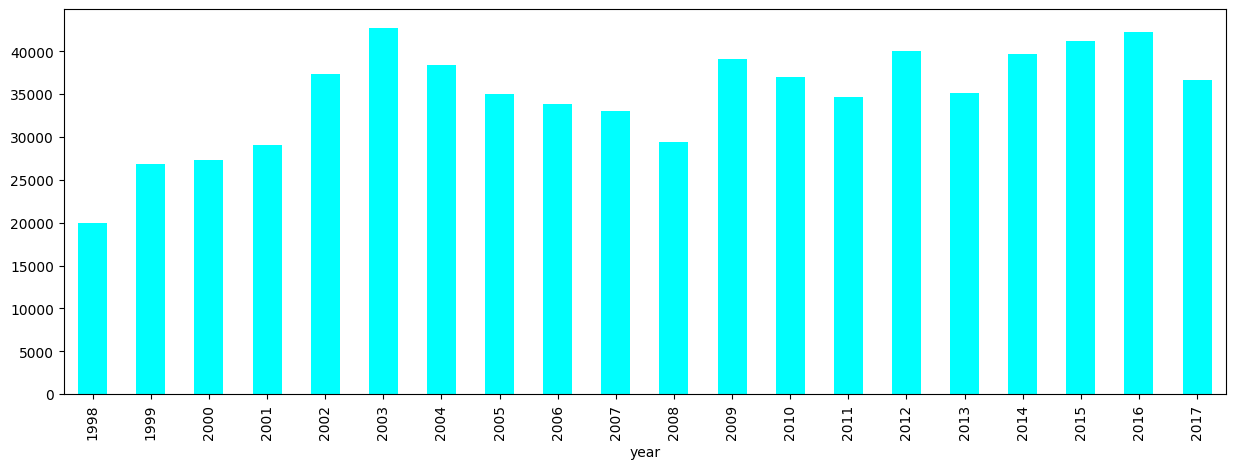

In [26]:
df.groupby('year')['number'].sum().plot(kind='bar', figsize=(15, 5), color='cyan')
plt.show()

In [30]:

df

,year,state,month,number,date,day
0,1998,Acre,Jan,0.0,1998-01-01,1
1,1999,Acre,Jan,0.0,1999-01-01,1
2,2000,Acre,Jan,0.0,2000-01-01,1
3,2001,Acre,Jan,0.0,2001-01-01,1
4,2002,Acre,Jan,0.0,2002-01-01,1
...,...,...,...,...,...,...
6449,2012,Tocantins,Dec,128.0,2012-01-01,1
6450,2013,Tocantins,Dec,85.0,2013-01-01,1
6451,2014,Tocantins,Dec,223.0,2014-01-01,1
6452,2015,Tocantins,Dec,373.0,2015-01-01,1


<Axes: xlabel='month'>

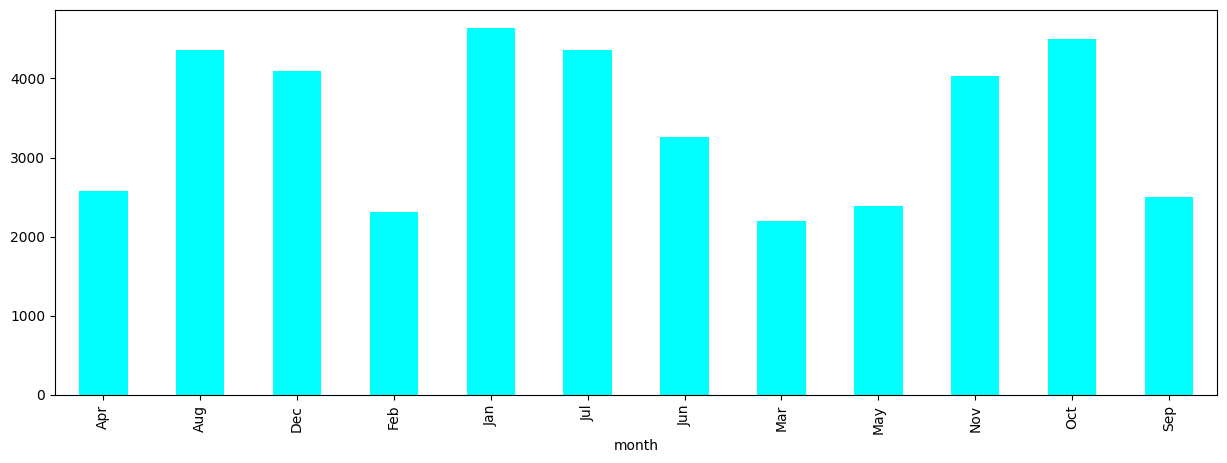

In [34]:
df[df['year']== 2015].groupby('month')['number'].sum().plot(kind='bar', figsize=(15, 5), color='cyan')

In [36]:
df['state'][df['month']=='Dec'].value_counts()

state
Rio                 57
Mato Grosso         38
Paraiba             38
Acre                19
Pará                19
Sergipe             19
Sao Paulo           19
Santa Catarina      19
Roraima             19
Rondonia            19
Piau                19
Pernambuco          19
Minas Gerais        19
Alagoas             19
Maranhao            19
Goias               19
Espirito Santo      19
Distrito Federal    19
Ceara               19
Bahia               19
Amazonas            19
Amapa               19
Tocantins           19
Name: count, dtype: int64

In [37]:
df['day'] = df['date'].dt.dayofweek

df['day'].value_counts()

day
3    1274
4     972
5     972
1     970
6     943
2     648
0     643
Name: count, dtype: int64

In [38]:
df.groupby('state')['number'].mean().sort_values(ascending=False)

state
Sao Paulo           213.896226
Mato Grosso         203.479975
Bahia               187.222703
Piau                158.174674
Goias               157.721841
Minas Gerais        156.800243
Tocantins           141.037176
Amazonas            128.243218
Ceara               127.314071
Paraiba             111.073979
Maranhao            105.142808
Pará                102.561272
Pernambuco          102.502092
Roraima             102.029598
Santa Catarina      101.924067
Amapa                91.345506
Rondonia             84.876272
Acre                 77.255356
Rio                  64.698515
Espirito Santo       27.389121
Alagoas              19.271967
Distrito Federal     14.899582
Sergipe              13.543933
Name: number, dtype: float64